In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
matches=pd.read_csv('matches.csv')
matches.info() #these are the ipl stats till 2016

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               577 non-null    int64  
 1   season           577 non-null    int64  
 2   city             570 non-null    object 
 3   date             577 non-null    object 
 4   team1            577 non-null    object 
 5   team2            577 non-null    object 
 6   toss_winner      577 non-null    object 
 7   toss_decision    577 non-null    object 
 8   result           577 non-null    object 
 9   dl_applied       577 non-null    int64  
 10  winner           574 non-null    object 
 11  win_by_runs      577 non-null    int64  
 12  win_by_wickets   577 non-null    int64  
 13  player_of_match  574 non-null    object 
 14  venue            577 non-null    object 
 15  umpire1          577 non-null    object 
 16  umpire2          577 non-null    object 
 17  umpire3         

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,4/18/2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,4/19/2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,4/19/2008,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,4/20/2008,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,4/20/2008,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [4]:
#in the info table we can see that the no. of winners is 3 less 
matches[pd.isnull(matches['winner'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
241,242,2011,Delhi,5/21/2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
486,487,2015,Bangalore,4/29/2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
511,512,2015,Bangalore,5/17/2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


In [5]:
#these were the three matches in which there no win or loss,so update these as draw.

matches['winner'].fillna('Draw', inplace=True)
#fillna() manages and let the user replace NaN values with some value of their own.
#When inplace = True , the data is modified in place, which means it will return nothing and the dataframe is now updated. When inplace = False , which is the default, then the operation is performed and it returns a copy of the object.

In [6]:
#so lets check now
matches.loc[241,'winner']

'Draw'

In [7]:
matches.loc[486,'winner']

'Draw'

In [8]:
matches.loc[511,'winner']

'Draw'

In [9]:
matches.loc[566,'winner']

'Royal Challengers Bangalore'

In [10]:
#lets replace the team names with their initials

matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW'],inplace=True)


matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,4/18/2008,KKR,RCB,RCB,field,normal,0,KKR,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,4/19/2008,CSK,KXIP,CSK,bat,normal,0,CSK,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN


In [11]:
encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
matches.replace(encode, inplace=True)
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,4/18/2008,2,3,3,field,normal,0,2,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,4/19/2008,5,9,5,bat,normal,0,5,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN


In [12]:
#in the info table we can see that the no. of citis is 7 less 
#Find cities which are null 
matches[pd.isnull(matches)['city']]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
402,403,2014,NaN,4/19/2014,1,3,3,field,normal,0,3,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
403,404,2014,NaN,4/19/2014,2,7,2,bat,normal,0,7,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
407,408,2014,NaN,4/23/2014,5,6,6,field,normal,0,5,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
409,410,2014,NaN,4/25/2014,10,7,10,bat,normal,0,10,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
410,411,2014,NaN,4/25/2014,1,5,1,bat,normal,0,5,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
415,416,2014,NaN,4/28/2014,3,9,9,field,normal,0,9,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
417,418,2014,NaN,4/30/2014,10,1,1,field,normal,0,10,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [17]:
#remove any null values, winner has hence fill the null value in winner as draw
#City is also null, this is mainly for Dubai stadium. Hence update the City as Dubai
#Make sure to impute the data(cleansing and finding missing data), there is also other process 
#to verify expected value based on other resultants, for now by stadium, city is easily manually updated
matches['city'].fillna('Dubai',inplace=True)



In [15]:
matches.loc[402,'city']

'Dubai'

In [18]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               577 non-null    int64  
 1   season           577 non-null    int64  
 2   city             577 non-null    object 
 3   date             577 non-null    object 
 4   team1            577 non-null    int64  
 5   team2            577 non-null    int64  
 6   toss_winner      577 non-null    int64  
 7   toss_decision    577 non-null    object 
 8   result           577 non-null    object 
 9   dl_applied       577 non-null    int64  
 10  winner           577 non-null    int64  
 11  win_by_runs      577 non-null    int64  
 12  win_by_wickets   577 non-null    int64  
 13  player_of_match  574 non-null    object 
 14  venue            577 non-null    object 
 15  umpire1          577 non-null    object 
 16  umpire2          577 non-null    object 
 17  umpire3         

In [19]:
matches.describe() #describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

,id,season,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets,umpire3
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,0.0
mean,289.000000,2012.029463,5.417678,5.481802,5.365685,0.025997,5.218371,13.715771,3.363951,NaN
std,166.709828,2.486247,3.281985,3.291946,3.255295,0.159263,3.196267,23.619282,3.416049,NaN
min,1.000000,2008.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN
25%,145.000000,2010.000000,3.000000,3.000000,3.000000,0.000000,2.000000,0.000000,0.000000,NaN
50%,289.000000,2012.000000,5.000000,5.000000,5.000000,0.000000,5.000000,0.000000,3.000000,NaN
75%,433.000000,2014.000000,8.000000,7.000000,7.000000,0.000000,7.000000,20.000000,6.000000,NaN
max,577.000000,2016.000000,13.000000,13.000000,13.000000,1.000000,14.000000,144.000000,10.000000,NaN


AttributeError: 'Series' object has no attribute 'get_value'

In [23]:
#team_match_total=matches.groupby(["team1"]).size()+matches.groupby(["team2"]).size()
#print(team_match_total.get_value(1))
xx=matches.groupby(["toss_winner"]).size()
print(xx.at[1])
yy=matches.groupby(["winner"]).size()
print(yy.at[1])

#get_value has been deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead.

74
80


In [24]:
#we maintain a dictionary for future reference mapping teams
dicVal = encode['winner']
print(dicVal['MI']) #key value
print(list(dicVal.keys())[list(dicVal.values()).index(1)]) #find key by value search

1
MI


In [25]:
matches = matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
matches.head(2)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,Bangalore,field,3,M Chinnaswamy Stadium,2
1,5,9,Chandigarh,bat,5,"Punjab Cricket Association Stadium, Mohali",5


In [26]:
df = pd.DataFrame(matches)
df.describe()

,team1,team2,toss_winner,winner
count,577.000000,577.000000,577.000000,577.000000
mean,5.417678,5.481802,5.365685,5.218371
std,3.281985,3.291946,3.255295,3.196267
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,2.000000
50%,5.000000,5.000000,5.000000,5.000000
75%,8.000000,7.000000,7.000000,7.000000
max,13.000000,13.000000,13.000000,14.000000


In [27]:
#31 cities
df["city"].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', 'Dubai', 'Rajkot', 'Kanpur'], dtype=object)

In [28]:
#35 venues
df["venue"].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [29]:
cat_list=df["city"]
encoded_data, mapping_index = pd.Series(cat_list).factorize()
print(encoded_data)
print(mapping_index)
print(mapping_index.get_loc("Visakhapatnam"))

[ 0  1  2  3  4  5  6  7  6  1  0  7  3  1  0  4  2  6  5  7  6  1  3  5
  0  7  3  2  4  5  0  7  6  5  1  4  3  1  2  3  2  5  6  4  0  4  3  7
  1  2  7  0  4  5  6  3  3  3  8  8  8  8  9 10  8 10  8 10 10  9  8 10
  9 11 10 10 11 11 12 10  9 13  9 13 12 10 10 11 11 11 12 14 14  9 13 14
 11 11 10 10 10 15  9 13 13 15 11 13 10 10 11 11 11 13 13  3  3  1  4  7
 16  0  4  2  0  2 17 16  3 17  7  3  0  1  3 16  1  0 16  3  2  3  7  2
  4  1  7  3  4  2 18  7  5  4  0  1 18  0  2  5 18  3  7  5  7 19  0  4
 19  2  4  3  3  3  3  7  6 20  2  3  4  5  0  1  3  6  5  3  7  6  3  4
 20  2  3  4  1  3  4  2  6  5  7  2  3 20  2  5  0 20  4  5  7  3  2  6
  7  3 20  6  0  4  3  0  1  5  6  1  5  7 21  0  3 19 21  3 19  7  3  3
 19  2  0  4  3  3  7  7  7  4  3  5  0 22  5 23 22  0  2  3  7  1  4  2
 23  4  0  3  5  0  1  6  7  1  7  2  3 17  5 23  1 23  2  7  4  2  3  7
 17  5  0 23  7  4  1  3  0  2 23  6  3  5 23  4  7  5  1  0  4  2  3 19
  2  6 19 23  6  5 23  0  7  7  4  0  6  2  7 23  6

In [30]:
cat_list1=df["venue"]
encoded_data1, mapping_index1 = pd.Series(cat_list1).factorize()
print(encoded_data1)
print(mapping_index1)
print(mapping_index1.get_loc("Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium"))

[ 0  1  2  3  4  5  6  7  6  1  0  7  8  1  0  4  2  6  5  7  6  1  8  5
  0  7  8  2  4  5  0  7  6  5  1  4  3  1  2  3  2  5  6  4  0  4  3  7
  1  2  7  0  4  5  6  3  3  8  9  9  9  9 10 11  9 11  9 11 11 10  9 11
 10 12 11 11 12 12 13 11 10 14 10 14 13 11 11 12 12 12 13 15 15 10 14 15
 12 12 11 11 11 16 10 14 14 16 12 14 11 11 12 12 12 14 14  8 17  1  4  7
 18  0  4  2  0  2 19 18 17 19  7 17  0  1 17 18  1  0 18  8  2 17  7  2
  4  1  7 17  4  2 20  7  5  4  0  1 20  0  2  5 20 17  7  5  7 21  0  4
 21  2  4  8  8  8  8  7  6 22  2  8  4  5  0  1  8  6  5  3  7  6  8  4
 22  2  3  4  1  3  4  2  6  5  7  2  8 22  2  5  0 22  4  5  7  3  2  6
  7  8 22  6  0  4  3  0  1  5  6  1  5  7 23  0  3 21 23  8 21  7  8  3
 21  2  0  4  3  3  7  7  7  4  3  5  0 24  5 25 24  0  2  3  7  1  4  2
 25  4  0  3  5  0  1  6  7  1  7  2  3 19  5 25  1 25  2  7  4  2  3  7
 19  5  0 25  7  4  1  3  0  2 25  6  3  5 25  4  7  5  1  0  4  2  3 21
  2  6 21 25  6  5 25  0  7  7  4  0  6  2  7 25  6

In [31]:
cat_list2=df["toss_decision"]
encoded_data2, mapping_index2 = pd.Series(cat_list2).factorize()
#print(encoded_data2)
print(mapping_index2)
print(mapping_index2.get_loc("field"))

Index(['field', 'bat'], dtype='object')
0


In [33]:
#Find some stats on the match winners and toss winners
temp1=df['toss_winner'].value_counts(sort=True)
temp2=df['winner'].value_counts(sort=True)

print('No of toss winners by each team')
for idx, val in temp1.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))

#Mumbai won most toss

No of toss winners by each team
MI -> 74
KKR -> 69
CSK -> 66
KXIP -> 64
DD -> 64
RR -> 63
RCB -> 61
DC -> 43
SRH -> 30
PW -> 20
KTK -> 8
GL -> 8
RPS -> 7


In [34]:
print('No of match winners by each team')
for idx, val in temp2.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))

#Mumbai won the most matches

No of match winners by each team
MI -> 80
CSK -> 79
RCB -> 70
KKR -> 68
KXIP -> 63
RR -> 63
DD -> 56
SRH -> 34
DC -> 29
PW -> 12
GL -> 9
KTK -> 6
RPS -> 5
Draw -> 3


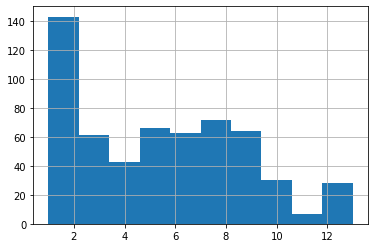

In [35]:
matches['toss_winner'].hist()

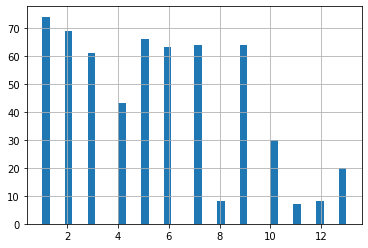

In [39]:
matches['toss_winner'].hist(bins=40)  #the id's are = {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13}

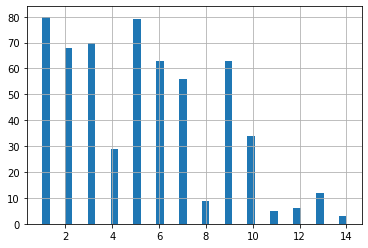

In [43]:
# the id's are = {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}

matches['winner'].hist(bins=40)

Text(0.5, 1.0, 'Match winners')

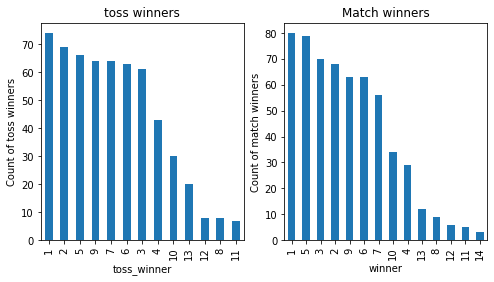

In [42]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121) #For example, "111" means "1x1 grid, first subplot" and "234" means "2x3 grid, 4th subplot".
ax1.set_xlabel('toss_winner')
ax1.set_ylabel('Count of toss winners')
ax1.set_title("toss winners")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('winner')
ax2.set_ylabel('Count of match winners')
ax2.set_title("Match winners")

In [44]:
df.apply(lambda x: sum(x.isnull()),axis=0) 
    #find the null values in every column

team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           0
dtype: int64

In [45]:
#building predictive model , convert categorical to numerical data
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,2,1,3,14,2
1,5,9,6,0,5,22,5
2,6,7,9,0,6,8,7
3,1,3,22,0,1,34,3
4,4,2,21,0,4,7,2
...,...,...,...,...,...,...,...
572,7,3,26,1,3,27,3
573,8,3,2,1,3,14,3
574,10,2,9,1,2,8,10
575,8,10,9,1,10,8,10


In [46]:
df.head(10)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,2,1,3,14,2
1,5,9,6,0,5,22,5
2,6,7,9,0,6,8,7
3,1,3,22,0,1,34,3
4,4,2,21,0,4,7,2
5,9,6,16,0,9,26,6
6,4,7,14,0,4,23,7
7,5,1,7,1,1,15,5
8,4,6,14,1,6,23,6
9,9,1,6,1,1,22,9


In [48]:
#now we wil build classification model,for predicting the outcome.
#we will check the accuracy to choose a final model.
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold  #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [49]:

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
      model.fit(data[predictors],data[outcome])
      predictions = model.predict(data[predictors])
      print(predictions)
      accuracy = metrics.accuracy_score(predictions,data[outcome])
      print('Accuracy : %s' % '{0:.3%}'.format(accuracy))

In [50]:
#logistic Regression
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
model =LogisticRegression()
classification_model(model, df,predictor_var,outcome_var)

[ 3  5  5  1  2  6  5  3  3  9  3  5  1  9  5  1  3  3  1  5  1  6  2  5
  3  3  2  9  2  3  3  9  1  6  5  5  1  9  3  1 10  1  1  2  3  2  1  5
  3  3  5  3  2  1  5  6  6  2  3  5  9  5  1  2  5  5  3  5  1  1  5  3
  1  6  5  5  6  6  2  5  1  3  5  1  5  9  5  1  3  6  5  7  5  1  3  5
  3  6  3  5  5  9  1  1  9  5  6  5  2  5  3  6  6  1  1  2  2  9  2  5
  9  5  2  3  3  5  3  6  2  5  9  2  3  9  2  5  5  3  6  1  5  2  5  5
  2  6  5  2  5  5  1  5  6  5  3  5  1  3 10  1  1  2  5  1  5  9  3  2
  9  5  1  2  2  2  2  5  3  5  5 10  2  6  3  9 10  1  1  1  5  3 10  2
  7  5  6  2  9  1  1  9  1  9  9  3  5  7  3  1  9 10  2  9  5  1  9  1
  5  8  9  3  3  2  1  5 10  3 10  9  1  5  9  3  1  9  9 10  5 10  2  1
  3 10  3  1  1  1  3  5  3  2  6  6  3  2  1  6  2  3  3  1  5  9  2  5
 10  2  5  1  5  5  6  5  9  9  5  9  6  3  1  6  6 10  2  5  2  5  1  5
 14  6  3  7  5 10  9  1  3  5  6  9  1  6  6  1  9 10  5  3  1  5  1  3
  3  5  9  7  1  1  1  3  3  5  2  3  9  5  5  6  5

C:\Users\archi\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\archi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [51]:
#Accuracy of logistic reg. : 30.676%

In [52]:
#Gaussian NAive bayes algorithm
from sklearn.naive_bayes import GaussianNB
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
model = GaussianNB() 
classification_model(model, df,predictor_var,outcome_var)

[ 3  5  5  1  2  6  5 12 12 12  3  5 12  5  5  2 12 12  5  5  5  6 12  6
 12 12 12 12  2 12  3 12  1 12  5  2 12 12 12 12  5 12 12  2  3 12 12  5
 12 12  5  3  2 12  5 12  6 12  3  5 12  5  1 12  5  5  3  5  5  1  6 12
  1  6  2  2  6  6  2  5  1 12  1  1  5 12  5  1  6  6  2 12  5  1 12  5
  1  6 12  5  5 12  1 12 12  6  5  5 12  5 12  5  6 12 12 12  2 12 12  5
  6  3  2 12  3  5 12  5  2  5 12  2  3 12 12  5  5  3  6 12  5 12  5  5
  2  6  5  2  2  5  6  5  6  2  3  3  1  3  5 12 12  2  5  6  5 12  3  2
 12  5  2  2  2  2  2  5 12 13  5 13  2  6  3 12 13 12 12 12  5 12 12 12
 12  5 13 12 12 12 12 12 12 12 12 12 13 12 12 12 12 10 12 12  5 12 12 12
  5 12 12 12 12  2 12  9 10 12  4 12 12  5 12  3  1 12 12 12  5  5 12  1
 12 10  3 12 12 12 12  5 12 12 12 12  3 12 12 13  2  3 12 12  5 12  2  5
 13 12  5 12  5 10  6  5 12 12  5 12  1 12 12 13  3 13 12  6  2  5 12  5
  4  6 12  1  5  2  5 12  3  5 13 12 12 12 12  2 12 10  5  3 12  7 12 12
 12  5 12  1 12  5  1  3 12  5 12  3 12  5  3 13  5

C:\Users\archi\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
#Accuracy of NAive bayes : 20.624%

In [54]:
#Applying K Nearest Neighbor (KNN) algorithm 

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
classification_model(model, df,predictor_var,outcome_var)

[ 3  5  5  1  2  6  7  5  6  9  3  5  1  9  3  1  3  9  6  5  4  2  1  6
  9  5  1  5  2  6  1  5  2  6  9  2  1  9  7  1  9  2  1  5  3  5  9  5
  9  1  5  3  2  6  3  6  1  6  1  1  7  4  4  2  4  7  2  3  3  2  7  3
  1  5  4  9  5  5  1  3  5  3  2  4  5  4  3  2  5  5  7  2  4  1  4  4
  3  1  3  4  3  9  1  4  3  7  4  3  2  3  7  3  2  4  4  1  1  9  1  3
  6  3  2  1  3  7  4  6  1  4  5  1  3  9  1  6  1  3  6  1  2  1  5  7
  2  2  5  1  2  2  4  5  6  2  3  1  4  3  9  6  4  1  5  6  5  4  1  2
  4  4  2  1  3  2  5  2  6  3  2 13  2  6  1  9 13  4  6  1  5  9  4  2
  4  4  1  2  9  1  3  9  1  6  5  3  2  3  3  6  3  4  2  6  5  1 10  1
  5  2  2  6  9  2  1  3 10  6 10  9  2  5  9  3  4  9  6  2  7  5  2  1
  4  9  3  1  5  1  1  5  5  6  9  6  3  1  6 13  1  3  7  1  5  9  2  4
 13  2  3  1  6  3  2  7  5  9  5  7  1  2  6  6  1  3  7  9  2  7  1  2
  4  6  9  2  5  2  5  1  3  2  6 10  1  6  3  2  5  6  9  1  1  7  1  4
  3  3  9  2  4  6  2  1  5  2  2  1 10  5  5 13 10

C:\Users\archi\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
#Accuracy of (KNN) algorithm  : 62.565%

In [56]:
df.head(3)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,2,1,3,14,2
1,5,9,6,0,5,22,5
2,6,7,9,0,6,8,7


In [57]:
#Import Library
from sklearn import svm
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create SVM classification object 
model = svm.SVC(kernel='rbf', C=1, gamma=1) 
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
# there is various option associated with it, like changing kernel, gamma and C value. Will discuss more # about it in next section.Train the model using the training sets and check score
classification_model(model, df,predictor_var,outcome_var)

[ 3  5  6  1  2  6  7  5  6  9  6  5  1  9  5  1  3  9  6  5  3  9  1  6
  3  4  1  5  2  6  1  5  2  6  9  2  1  9  7  1  9  6  1  5  3  6  9  5
  9  1  5  3  2  6  5  6  5  6  1  3  7  4  5  2  4  7  6  3  4  7  9  4
  1  6  3  9  7  5  1  3  6  5  9  3  5  6  7  4  6  5  7  9  5  1  7  4
  3  1  7  3  6  9  5  4  9  7  2  3  2  5  7  3  4  3  4  2  1  7  2  4
  6  3  2  1  3  5  4  6  3  4  9  1  3  6  1  6  2  3  6  1  2  1  5  7
  2  3  5  1  9  7  6  5  6  2  3  1  4  3  9  6  4  1  5  3  5  4  1  2
  5  4  1  1  5  3  5  2  6  3  1 13  2  6  1  9 13  4  6 12  5  9  7  2
  5  4  1 12  9  1  3  9  1  6  5  3  5  4  2  6  3  7  2  6  5  1 12  2
  5  1 12  7  3  2  1  3 13  6 13  9  6  5  9  3  4  9 12  4  9  5  2  6
  4 14  3  1  5  1  3  5  5  7 13  6  3  5  6  9  1  3  7  1  5  9  2  4
  5  2  6  1  6  3  9  7  5  9  5 13  1  2  6  7  1  4  7  9  2  7  1  2
  4  7  3  1  5  2  6  1  3  2  6  9  1  5  3  1  5  6  9  1  5  7  1  9
  3  4  9  2  4  6  2  5  5  2  2  1 10  6  1  9 10

C:\Users\archi\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
#Accuracy of SVM : 89.081%

In [59]:
#Gradient boost algorithm
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=0)
classification_model(model, df,predictor_var,outcome_var)

C:\Users\archi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ 3  5  6  1  2  6  7  5  6  9  6  5  1  9  5  1  3  9  6  5  3  2  1  6
  3  4  1  5  2  6  1  5  2  6  9  2  1  9  7  1  9  3  1  5  3  6  9  5
  9  1  5  4  2  6  5  6  5  6  1  3  7  4  5  2  4  7  6  9  4  7  9  4
  1  6  3  9  7  5  1  9  6  5  9  3  5  6  7  4  6  5  7  9  5  1  7  4
  3  1  7  3  6  9  5  4  9  7  2  3  2  5  7  3  4  3  4  2  1  7  2  4
  7  3  2  1  3  5  4  6  3  4  9  1  3  6  1  6  2 14  6  1  2  1  5  7
  2  3  5  1  9  7  6  5  6  2  4  9  4  3  9  6  4  1  5  3  5  4  1  2
  5  4  2  1  5  3  5  2  6  3  1 13  2  6  1  9 13  4  6 12  5  9  7  2
 12  4  1 12  9  5  3  9  1  6  5  3  5  4  2  6  3  7  2  6  5  1 12  2
  5  1 12  7  3  2  1  3 13  6 13  9  3  5  9  3  4  9 12  4  9  5  2  6
  4 14  5  1  5  1  3  5  5  7 13  6  3  5  6 13  1  3  7  1  5  9  2  4
 13  2  6  1  6  3  2  7  5  9  5 13  1  2  6  7  1  4  7  9  2  7  1  2
  4  7  3  1  5  2  6  1  3  2  6  9  3  5  3  2  5  6  9  1  5  7  1  9
  3  4  9  2  4  1  2  5  5  2  2  1 10  6  1 13 10

In [60]:
#Decision tree algorithm
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini')
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

[ 3  5  6  1  2  6  7  1  6  9  6  5  1  9  5  1  3  9  6  5  3  2  1  6
  3  4  1  5  2  6  1  5  2  6  9  2  1  9  7  1  9  3  1  5  3  6  9  5
  9  1  5  3  2  6  5  6  5  6  1  3  7  4  5  2  4  7  6  3  4  7  9  4
  1  6  3  9  7  5  1  3  6  5  9  3  5  6  7  4  6  5  7  9  5  1  7  4
  3  1  7  3  6  9  5  4  9  7  2  3  2  5  7  3  4  3  4  2  1  7  2  4
  6  3  2  1  3  5  4  6  3  4  9  1  3  6  1  6  2  3  6  1  2  1  5  7
  2  3  5  1  9  7  6  1  6  2  3  1  4  3  9  6  4  1  5  3  5  4  1  2
  5  4  1  1  5  3  5  2  6  3  1 13  2  6  1  9 13  4  6 12  5  9  7  2
 12  4  1 12  9  1  3  9  1  6  5  3  5  4  2  6  3  7  2  6  5  1 12  2
  5  1 12  7  3  2  1  3 13  5 13  9  3  5  9  3  4  9 12  4  9  5  2  6
  4 14  3  1  5  1  3  5  1  7 13  6  3  5  6  9  1  3  7  1  5  9  2  4
  5  2  6  1  6  3  2  7  5  3  5 13  1  2  3  7  1  4  7  9  2  7  1  2
  4  7  3  1  5  2  6  1  3  2  6  9  1  5  3  1  5  6  9  1  5  7  1  9
  3  4  9  2  4  1  2  5  5  2  2  1 10  6  1  9 10

In [61]:
#Random forest classifier
model = RandomForestClassifier(n_estimators=100)
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

C:\Users\archi\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[ 3  5  6  1  2  6  7  5  6  9  6  5  1  9  5  1  3  9  6  5  3  2  1  6
  9  4  1  5  2  6  1  5  2  6  9  2  1  9  7  1  9  6  1  5  3  6  9  5
  9  7  5  3  2  6  5  6  5  6  1  3  7  4  5  2  4  7  6  3  4  7  9  4
  1  6  3  9  7  5  1  3  6  5  9  3  5  6  7  4  6  5  7  9  5  1  7  4
  3  1  7  3  6  9  5  4  9  7  2  3  2  5  7  3  4  3  4  2  1  7  2  4
  7  3  2  7  3  5  4  6  3  4  9  1  3  6  1  6  2  7  6  1  2  1  5  7
  2  3  5  1  9  7  6  1  6  2  3  1  4  3  9  6  4  1  5  3  5  4  1  2
  5  4  2  1  5  3  5  2  6  3  1 13  2  6  1  9 13  4  6 12  5  9  7  2
 12  4  1 12  9  1  3  9  1  6  5  3  5  4  2  6  3  7  2  6  5  1 12  2
  5  1 12  7  9  2  1  3 13  6 13  9  6  5  9  3  4  9 12  4  9  5  2  6
  4 14  3  1  5  1  3  5  5  7 13  6  3  5  6  9  1  3  7  1  5  9  2  4
  5  2  6  1  6  3  2  7  5  9  5 13  1  2  6 13  1  4  7  9  2  7  1  2
  4  7  9  1  5  2  6  1  3  2  6  9  1  5  3  2  5  6  9  1  5  7  1  9
  3  4  9  2  4  1  2  5  5  2  2  1 10  6  1  9 10

In [62]:
df.head()

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,2,1,3,14,2
1,5,9,6,0,5,22,5
2,6,7,9,0,6,8,7
3,1,3,22,0,1,34,3
4,4,2,21,0,4,7,2


In [63]:
test= pd.read_csv("test.csv")
test.head()

,team1,team2,city,toss_winner,venue,toss_decision,date,winner
0,KXIP,MI,3,MI,3,0,11-Apr,MI
1,SRH,RR,5,RR,5,0,27-Apr,RR
2,KKR,MI,3,MI,3,0,5-May,MI
3,CSK,MI,7,CSK,7,1,7-May,MI
4,DC,CSK,22,CSK,24,1,10-May,CSK


In [66]:
#now lets remove the date and winner column
test = test.drop(["date","winner"],axis=1,inplace=False)

In [67]:
test.head(2)

,team1,team2,city,toss_winner,venue,toss_decision
0,KXIP,MI,3,MI,3,0
1,SRH,RR,5,RR,5,0


In [68]:
test.replace(encode, inplace=True)
test.head(2)

,team1,team2,city,toss_winner,venue,toss_decision
0,9,1,3,1,3,0
1,10,6,5,6,5,0


In [69]:
out = model.predict(test)
out

array([1, 6, 1, 5, 5], dtype=int64)

In [70]:
predicted_winner=[]
for i in out:
    #print(list(dicVal.keys())[list(dicVal.values()).index(i)])
    predicted_winner.append(list(dicVal.keys())[list(dicVal.values()).index(i)])

In [71]:
ipl=pd.read_csv('test.csv')
ctr=0
k=0
total=len(ipl['winner'])
for i in ipl['winner']:
    if i==predicted_winner[k]:
        ctr=ctr+1
    k=k+1  
print(ctr)
print("Accuracy of our prediction of recent IPL is ", ctr/total)

4
Accuracy of our prediction of recent IPL is  0.8


In [72]:
predicted_winner


['MI', 'RR', 'MI', 'CSK', 'CSK']

In [73]:
#lets store the result in sub 
sub = pd.DataFrame()

sub = pd.DataFrame()
sub['team1'] = ipl['team1']
sub['team2'] = ipl['team2']
sub['venue'] = ipl['venue']
sub['toss_winner'] =ipl['toss_winner']
sub['city'] = ipl['city']
sub['toss_decision'] = ipl['toss_decision']
sub['date of match']=ipl['date']
sub['actual_winner']=ipl["winner"]
sub['Predicted_winner'] = predicted_winner


In [74]:
#now lets convert the data frame to a csv file
sub.to_csv('ipl2.csv',index=False)

In [75]:
sub.head()

,team1,team2,venue,toss_winner,city,toss_decision,date of match,actual_winner,Predicted_winner
0,KXIP,MI,3,MI,3,0,11-Apr,MI,MI
1,SRH,RR,5,RR,5,0,27-Apr,RR,RR
2,KKR,MI,3,MI,3,0,5-May,MI,MI
3,CSK,MI,7,CSK,7,1,7-May,MI,CSK
4,DC,CSK,24,CSK,22,1,10-May,CSK,CSK


In [77]:
#feature importances: If we ignore teams, Venue seems to be one of important factors in determining winners 
#followed by toss winning, city
print()
print("Feature importances: If we ignore teams, Venue seems to be one of important factors in determining winners followed by toss winning, city")
imp_input = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print()
print(imp_input)#this shows which features plays imp role in prediction

#we can see that toss_winner and venue also plays imp role.



Feature importances: If we ignore teams, Venue seems to be one of important factors in determining winners followed by toss winning, city

team2            0.254109
team1            0.211314
toss_winner      0.171267
venue            0.167944
city             0.159967
toss_decision    0.035398
dtype: float64


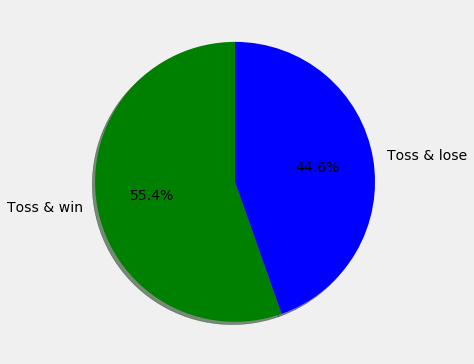

In [78]:
#probability of match winning by winning toss for MI
#df['toss_winner'].value_counts()
count =0
for i in range(577): 
    if df["toss_winner"][i]==df["winner"][i]==1 :
        count=count+1
        
#probability of match winning by winning toss for MI
#df['toss_winner'].value_counts()
count =0
for i in range(577): 
    if df["toss_winner"][i]==df["winner"][i]==1 :
        count=count+1
#okay from the above prediction on features, we notice toss winner has least chances of winning matches
#but does the current stats shows the same result
#df.count --> 577 rows
import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
#df_fil=df[df['toss_winner']==df['winner']]
df_fil=df[df['toss_winner']==1]
#slices=[len(df_fil),(577-len(df_fil))]
slices=[count,(len(df_fil)-count)]
mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['g','b'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

# Toss winning does not gaurantee a match win from analysis of current stats and thus 
#prediction feature gives less weightage to that   


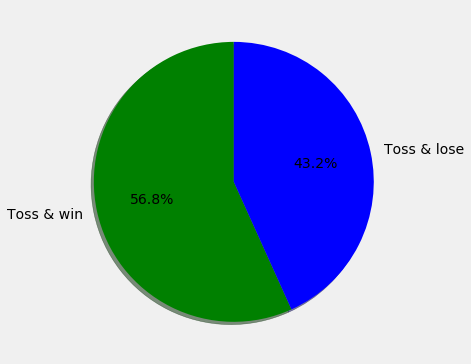

In [80]:
#probability of match winning by winning toss for Chennai Super Kings CSK
#df['toss_winner'].value_counts()
count =0
for i in range(577): 
    if df["toss_winner"][i]==df["winner"][i]==5 :
        count=count+1
#okay from the above prediction on features, we notice toss winner has least chances of winning matches
#but does the current stats shows the same result
#df.count --> 577 rows
import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
#df_fil=df[df['toss_winner']==df['winner']]
df_fil=df[df['toss_winner']==1]
#slices=[len(df_fil),(577-len(df_fil))]
slices=[count,(len(df_fil)-count)]
mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['g','b'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()
# Toss winning does not gaurantee a match win from analysis of current stats and thus 
#prediction feature gives less weightage to that

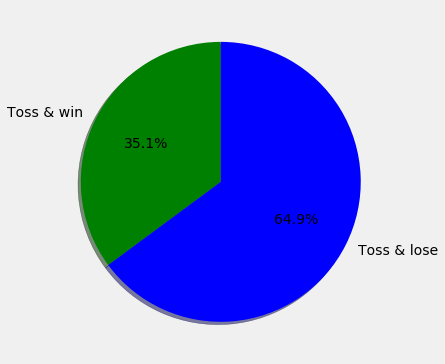

In [81]:
#probability of match winning by winning toss for KXIP
#df['toss_winner'].value_counts()
count =0
for i in range(577): 
    if df["toss_winner"][i]==df["winner"][i]==9 :
        count=count+1
#okay from the above prediction on features, we notice toss winner has least chances of winning matches
#but does the current stats shows the same result
#df.count --> 577 rows
import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
#df_fil=df[df['toss_winner']==df['winner']]
df_fil=df[df['toss_winner']==1]
#slices=[len(df_fil),(577-len(df_fil))]
slices=[count,(len(df_fil)-count)]
mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['g','b'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()
# Toss winning does not gaurantee a match win from analysis of current stats and thus 
#prediction feature gives less weightage to that

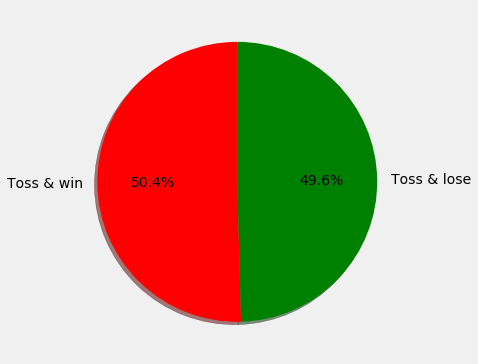

In [82]:
#Genralised probbaility for winning match by winning toss

import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
df_fil=df[df['toss_winner']==df['winner']]

slices=[len(df_fil),(577-len(df_fil))]

mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['r','g'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

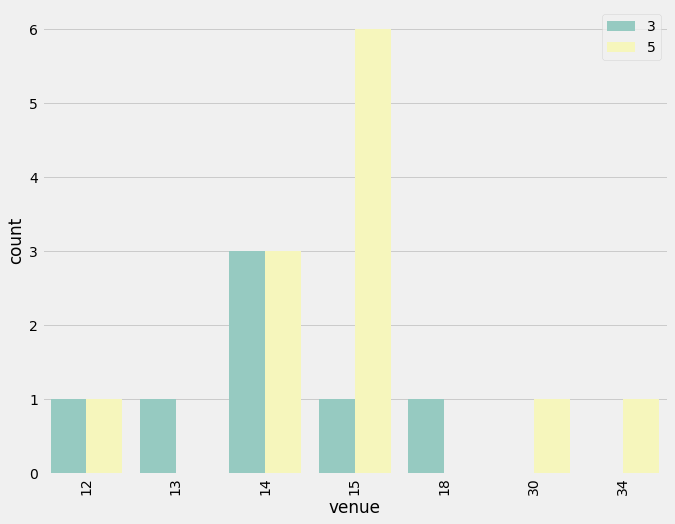

'MA Chidambaram Stadium, Chepauk'

In [96]:
#top 2 team analysis based on number of matches won against each other and how venue affects them?
#Previously we noticed that CSK won 79, RCB won 70 matches
#now let us compare venue against a match between CSK and RCB
#we find that CSK has won most matches against RCB in MA Chidambaram Stadium, Chepauk, Chennai
#RCB has not won any match with CSK in stadiums St George's Park and Wankhede Stadium, but won matches
#with CSK in Kingsmead, New Wanderers Stadium.
#It does prove that chances of CSK winning is more in Chepauk stadium when played against RCB.
# Proves venue is important feature in predictability



import seaborn as sns
team1=dicVal['CSK']
team2=dicVal['RCB']
mtemp=matches[((matches['team1']==team1)|(matches['team2']==team1))&((matches['team1']==team2)|(matches['team2']==team2))]
sns.countplot(x='venue', hue='winner',data=mtemp,palette='Set3')
mlt.xticks(rotation='vertical')
leg = mlt.legend( loc = 'upper right')
fig=mlt.gcf()
fig.set_size_inches(10,8)
mlt.show()
le.classes_[15] #15 is for 'MA Chidambaram Stadium, Chepauk'
